In [2]:
import numpy as np

N classes of jobs  
 1 =< j =< N  
Reward r[j]  
r[1] > r[2] ...
P[j] is the prob that a job is of class j  
    sum(p[j]) = 1  
The goal is to maximize the rewards  

### Admission control   
s[t] is the state of the sys at t
s[t] = r[t] the reward of the job t  
The action set is A = {0,1} ADMIT OR DO NOT ADMIT  

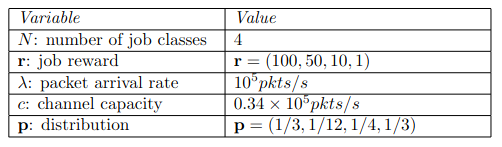

In [18]:
N = 4 # Number of jobs
l = 10**5 # Lambda : Packet arrival rate
c = 0.34 * 10**5 # Channel capacity
s = 4 # States of the system
p = [1/3, 1/12, 1/4, 1/3] # Probability at t
r = [100, 50, 10, 1] # Reward

nb_paquets = np.random.poisson(l, s) # Number of packets

In [35]:

for paquet in nb_paquets:
    # Initialize the state randomly
    state = np.zeros(N)
    # Calculate packet arrival for each class j
    arrival = np.array(p* nb_paquets) # shape (N,)
    admission = np.concatenate((np.ones((int(c), s)), np.zeros((int(l-c), s)))) # shape (l, N)
    admitted = arrival * admission # shape (l, N)
    # Calculate reward
    r = np.array(r) # shape (N,)
    reward = sum(r * admitted) # shape (N,)
    # Update state
    new_state = state + reward # shape (N,)
    

In [10]:
import numpy as np

# Parameters
N = 4  # Number of jobs
l = 10**5  # Lambda: Packet arrival rate
c = 0.34 * 10**5  # Channel capacity
s = [0]  # States of the system
p = [1/3, 1/12, 1/4, 1/3]  # Probability at t
r = [100, 50, 10, 1]  # Reward

# Initialize Q-table with zeros
Q = np.zeros((N + 1, N + 1, N + 1, N + 1))

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate

# Number of episodes
num_episodes = 10000

# Q-learning algorithm
for episode in range(num_episodes):
    # Initialize the state
    state = tuple(np.random.randint(0, N + 1, N))
    
    # Select the action using epsilon-greedy policy
    if np.random.rand() < epsilon:
        action = tuple(np.random.randint(0, N + 1, N))
    else:
        action = np.unravel_index(np.argmax(Q[state], axis=None), Q[state].shape)
    
    # Calculate the reward based on the selected action
    reward = sum(r[i] * action[i] for i in range(N))
    
    # Update the Q-value using the Q-learning update rule
    next_state = state
    while sum(next_state) < N:
        next_state = tuple(np.random.randint(0, N + 1, N))
    
    max_next_Q = np.max(Q[next_state])
    Q[state][action] = Q[state][action] + alpha * (reward + gamma * max_next_Q - Q[state][action])

# Policy based on the learned Q-values
def policy(state):
    return np.unravel_index(np.argmax(Q[state], axis=None), Q[state].shape)

# Simulate packet admission using the learned policy
def simulate_admission():
    state = tuple(np.zeros(N))
    num_accepted = 0
    for _ in range(sum(state), N):
        action = policy(state)
        if sum(action) <= N and np.random.rand() < p[sum(action)]:
            state = tuple(np.array(state) + np.array(action))
            num_accepted += 1
    return num_accepted

# Simulate multiple runs to estimate the expected admission rate
num_runs = 1000
total_accepted = 0
for _ in range(num_runs):
    total_accepted += simulate_admission()

expected_admission_rate = total_accepted / (num_runs * N)
print("Expected Admission Rate:", expected_admission_rate)


IndexError: tuple index out of range